# baby names Ireland

https://www.cso.ie/en/interactivezone/visualisationtools/babynamesofireland/

In [5]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as plt
import matplotlib.dates as mdates

In [314]:
years = range(1970,2020)

In [373]:
girls=[]
for y in years:
    df=pd.read_csv('Top Girls Names %s. Source CSO Ireland.csv' %y)
    df['year']=y
    girls.append(df)
girls = pd.concat(girls)
#girls.to_csv('girls_names_cso_ireland.csv',index=False)

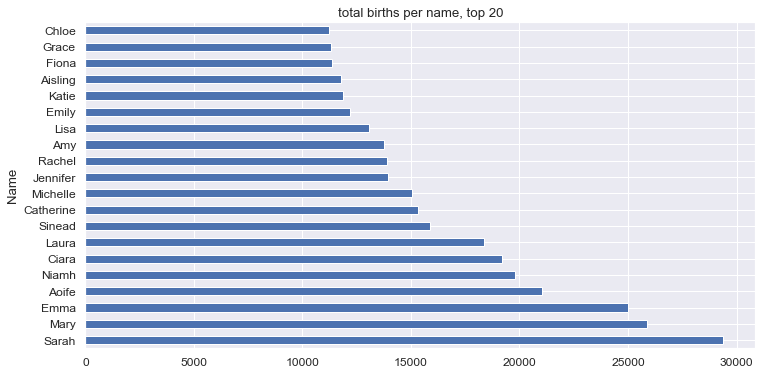

In [489]:
totals=girls.groupby('Name').sum()['Number of Births'].sort_values(ascending=False)
totals[:20].plot(kind='barh',figsize=(12,6))
plt.title('total births per name, top 20')
plt.savefig('girls_names_totals_top20.png',dpi=150)

In [374]:
X = pd.pivot_table(girls,index='Name',columns='year',values='Number of Births')
Xs = X.reindex(X.std(1).sort_values(ascending=False).index)
Xm = X.reindex(X.mean(1).sort_values(ascending=False).index)

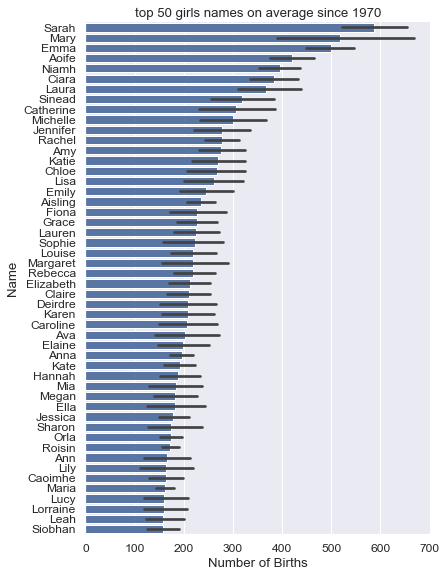

In [538]:
top50 = Xm[:50].index
m = girls[girls.Name.isin(top50)]
sns.set(font_scale=1.1)
fg=sns.catplot(data=m,y='Name',x='Number of Births',kind='bar',order=top50,color='b',height=8,aspect=.8)
plt.title('top 50 girls names on average since 1970')
fg.savefig('girls_names_top50.png',dpi=150)

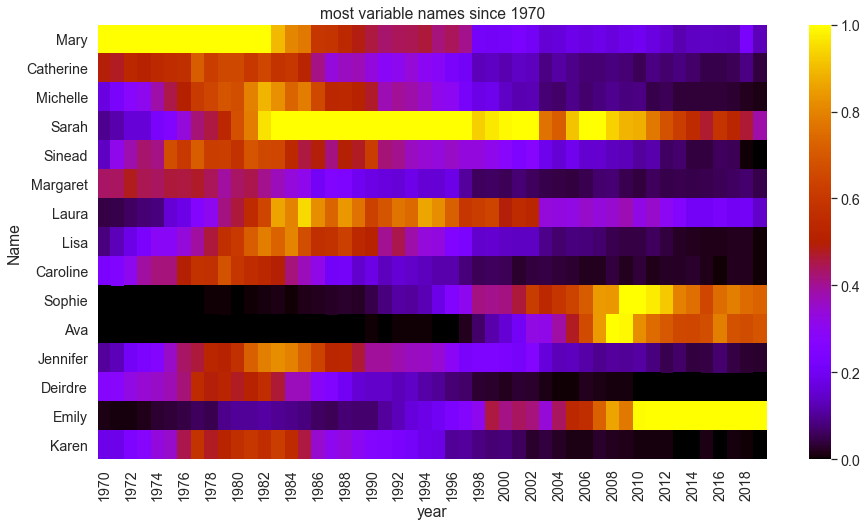

In [491]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8))
xnorm = (Xs-Xs.min())/(Xs.max()-Xs.min())
g=sns.heatmap(xnorm[:15],cmap='gnuplot')
g.set_facecolor('black')
plt.title('most variable names since 1970')
plt.savefig('girls_names_heatmap.png',dpi=150)

<Figure size 1440x576 with 0 Axes>

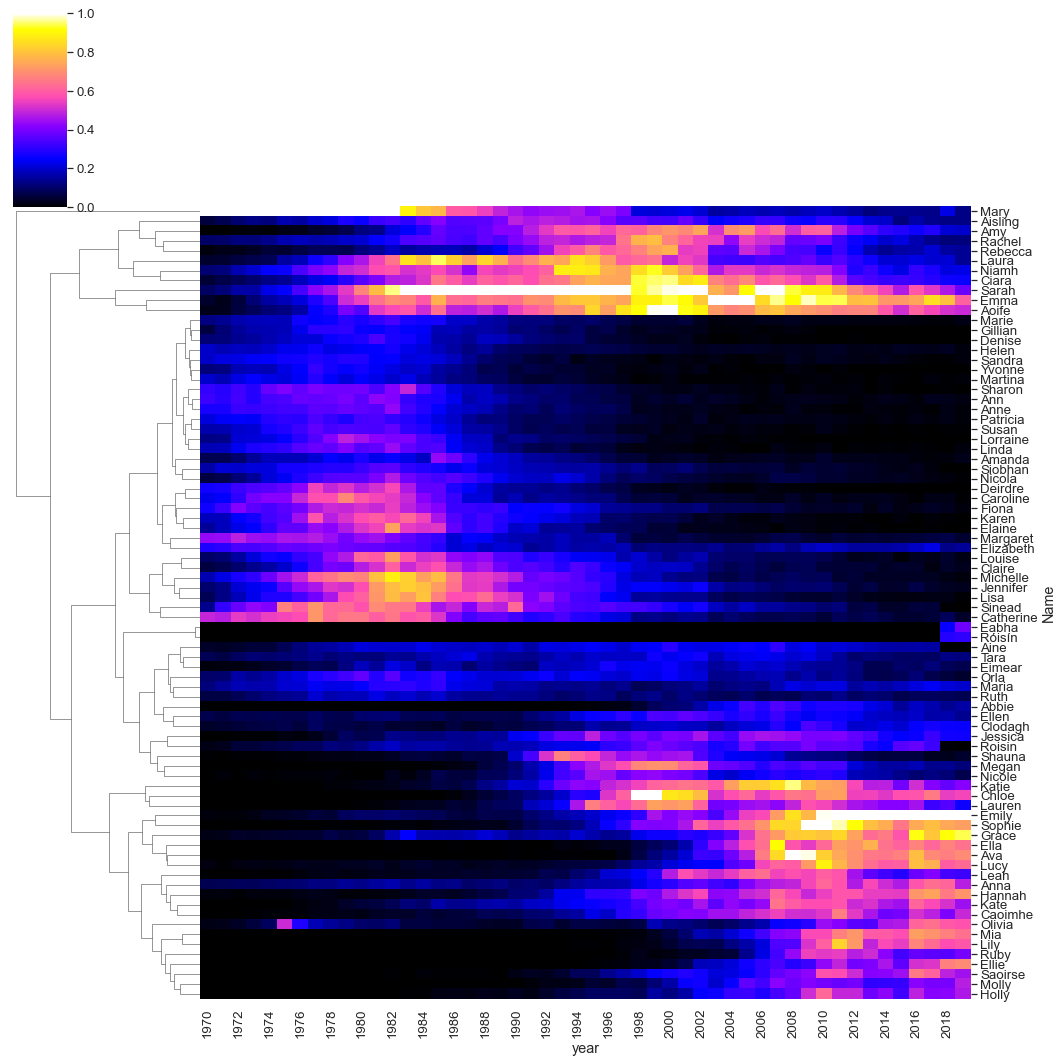

In [526]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20,8))
xnorm = (Xm-Xm.min())/(Xm.max()-Xm.min())
xnorm =xnorm.fillna(0)
g=sns.clustermap(xnorm[:80],cmap='gnuplot2',col_cluster=False,yticklabels=True,figsize=(15,15))
plt.savefig('girls_names_clustermap_top80.png',dpi=150)

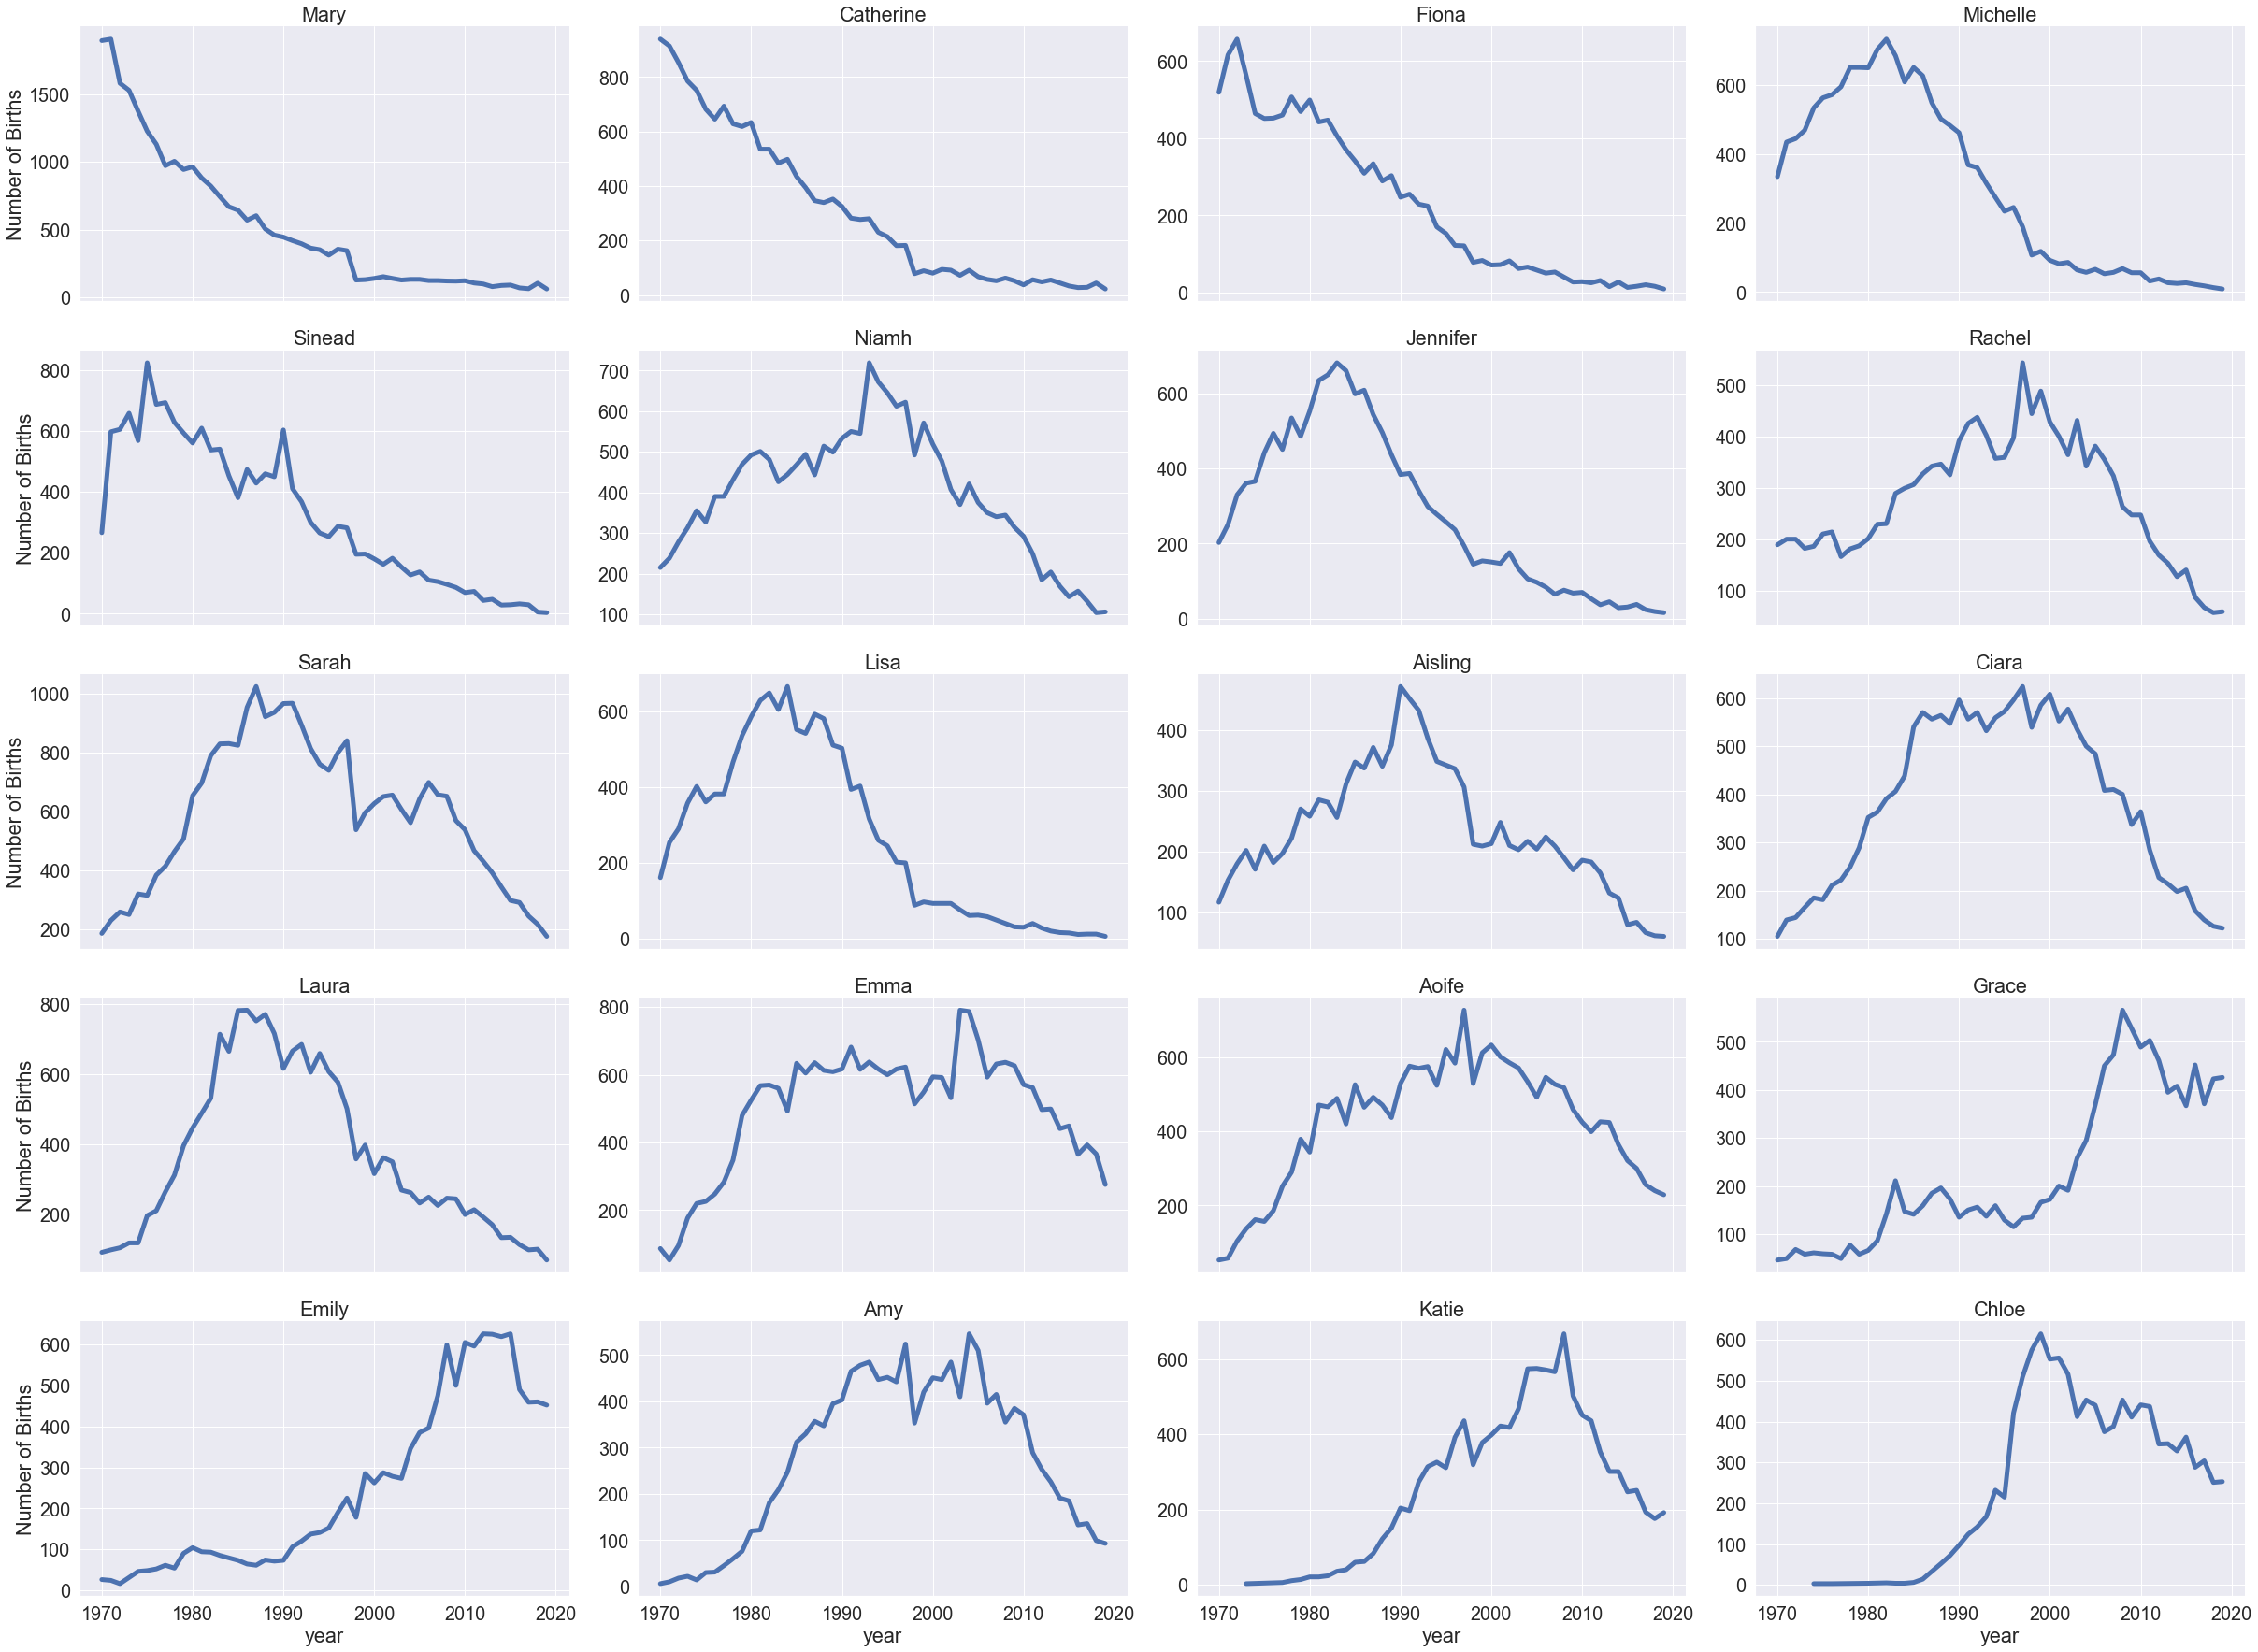

In [466]:
sns.set(font_scale=1.8)
top = Xm[:20].index
m = girls[girls.Name.isin(top)]
fg=sns.relplot(data=m,x='year',y='Number of Births',col='Name',col_wrap=4,
               kind='line',height=5,aspect=1.7,lw=5,facet_kws={'sharey': False})
fg.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.savefig('girls_names_trends.png',dpi=150)

## top names per year

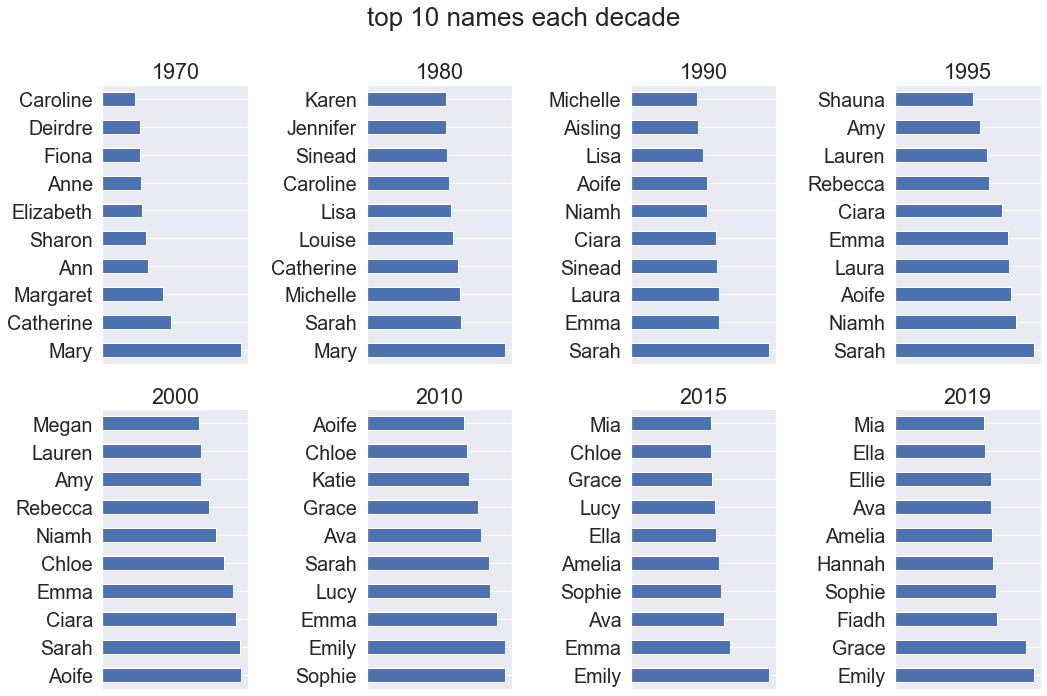

In [473]:
fig,axs=plt.subplots(2,4,figsize=(15,10))
axs=axs.flat
i=0
for y in [1970,1980,1990,1995,2000,2010,2015,2019]:
    ax=axs[i]
    x = girls[girls.year==y]
    x = x[:10]
    #print(x[:10])
    x.plot(x='Name',y='Number of Births',kind='barh',legend=False,ax=ax,xlabel='')
    ax.xaxis.set_visible(False)
    ax.set_title(y)
    i+=1
fig.suptitle('top 10 names each decade')
plt.tight_layout()
fig.savefig('girls_names_perdecade.png',dpi=150)

## 3d bars

In [ ]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121, projection='3d')
S = X[:4].sort_index()
# fake data
ypos = np.arange(len(S.index))
xpos = range(len(S.columns))
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(xpos, ypos)
x, y = _xx.ravel(), _yy.ravel()

top = S.values.ravel()

colors=[]
cmap=plt.cm.get_cmap('gnuplot')
clrs = [cmap(float(i)/len(ypos)) for i in ypos]
for i in ypos:    
    c = [clrs[i] for n in xpos]
    colors.extend(c)
    
bottom = np.zeros_like(top)
width = 1
depth = .5
ax.bar3d(x, y, bottom, width, depth, top, shade=True, alpha=0.4, color=colors,lw=.2)
ax.set_yticks(ypos+0.5)
ax.w_xaxis.set_ticklabels(S.columns)
ax.w_yaxis.set_ticklabels(S.index)